In [3]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('telco.csv')

In [7]:
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [11]:
#counting null values
nullvalues = df.isnull().sum()
nullvalues

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

In [13]:
#handling null values
lists = ['Offer','Internet Type','Churn Category','Churn Reason']
for n in lists:
    maxval = df[n].value_counts().idxmax()
    df[n].replace(np.nan,maxval,inplace=True)
    # print(df[n].dtypes)
    # print(values)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11980\3140897665.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[n].replace(np.nan,maxval,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11980\3140897665.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [15]:
print(df.isnull().sum())

Customer ID                          0
Gender                               0
Age                                  0
Under 30                             0
Senior Citizen                       0
Married                              0
Dependents                           0
Number of Dependents                 0
Country                              0
State                                0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Population                           0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download  

In [17]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [19]:
#handling duplicate values
df.drop_duplicates(inplace=True)

In [21]:
#feature engineering
df.drop(['Under 30','Dependents','Senior Citizen','Latitude','Longitude','Zip Code','Customer ID'],axis=1,inplace=True)

In [23]:
df.shape

(7043, 43)

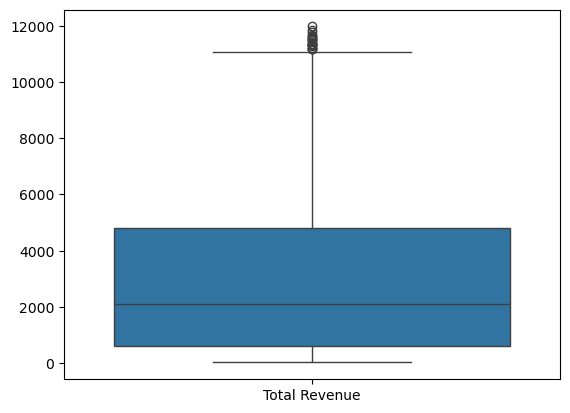

In [25]:
#visualizing outliers
sns.boxplot(data=df[['Total Revenue']])
plt.show()

In [27]:
#handling outliers in Total Revenue column
q1=df['Total Revenue'].quantile(0.25)
q3=df['Total Revenue'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(iqr*1.5)
upper_bound=q3+(iqr*1.5)
df['Total Revenue'] = np.where(df['Total Revenue'] > upper_bound, upper_bound, 
                               np.where(df['Total Revenue'] < lower_bound, lower_bound, df['Total Revenue']))


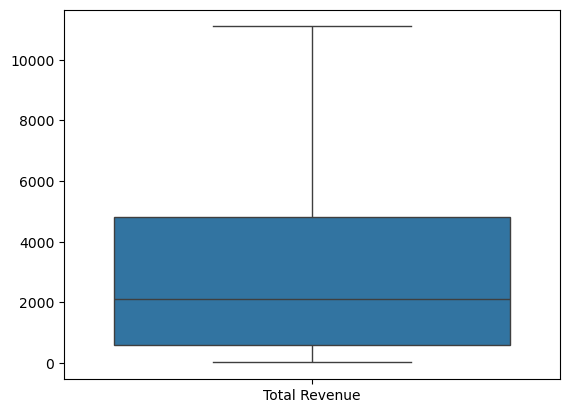

In [29]:
#after removal of outliers
sns.boxplot(data=df[['Total Revenue']])
plt.show()

In [31]:
#encode categorical variables
df['Married'].unique()
df['Gender'].unique()
df['Churn Label'].unique()
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Churn Label'] = df['Churn Label'].map({'Yes': 1, 'No': 0})

# EXPLORATORY DATA ANALYSIS

In [33]:
df.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'Country', 'State',
       'City', 'Population', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_11980\1414234584.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks)


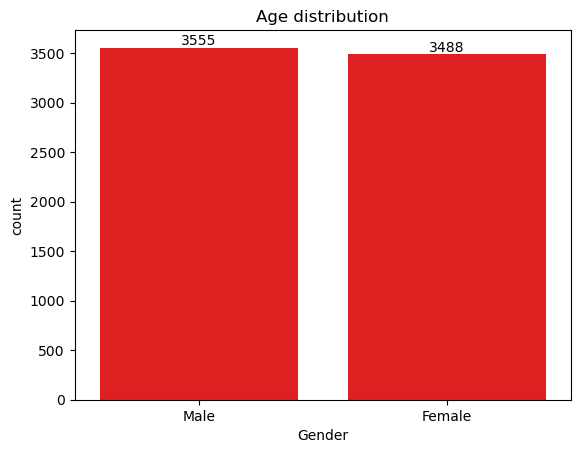

In [35]:
ax=sns.countplot(data=df,x='Gender',color='red')
xticks = ['Male','Female']
for c in ax.containers:
    ax.bar_label(c)
ax.set_xticklabels(xticks)
plt.title('Age distribution')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11980\1421707297.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks)


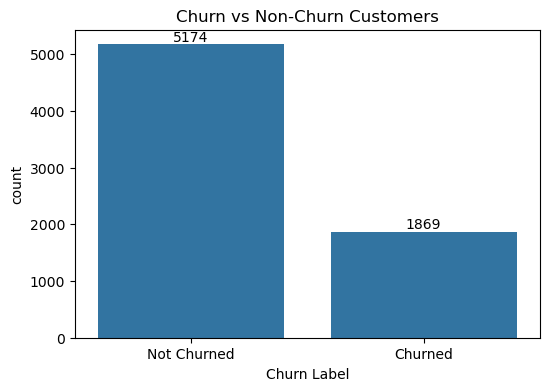

In [41]:
# Churn Distribution
plt.figure(figsize=(6,4))
ax=sns.countplot(x=df['Churn Label'])
xticks=['Not Churned','Churned']
plt.title("Churn vs Non-Churn Customers")
for c in ax.containers:
    ax.bar_label(c)
ax.set_xticklabels(xticks)
plt.show()

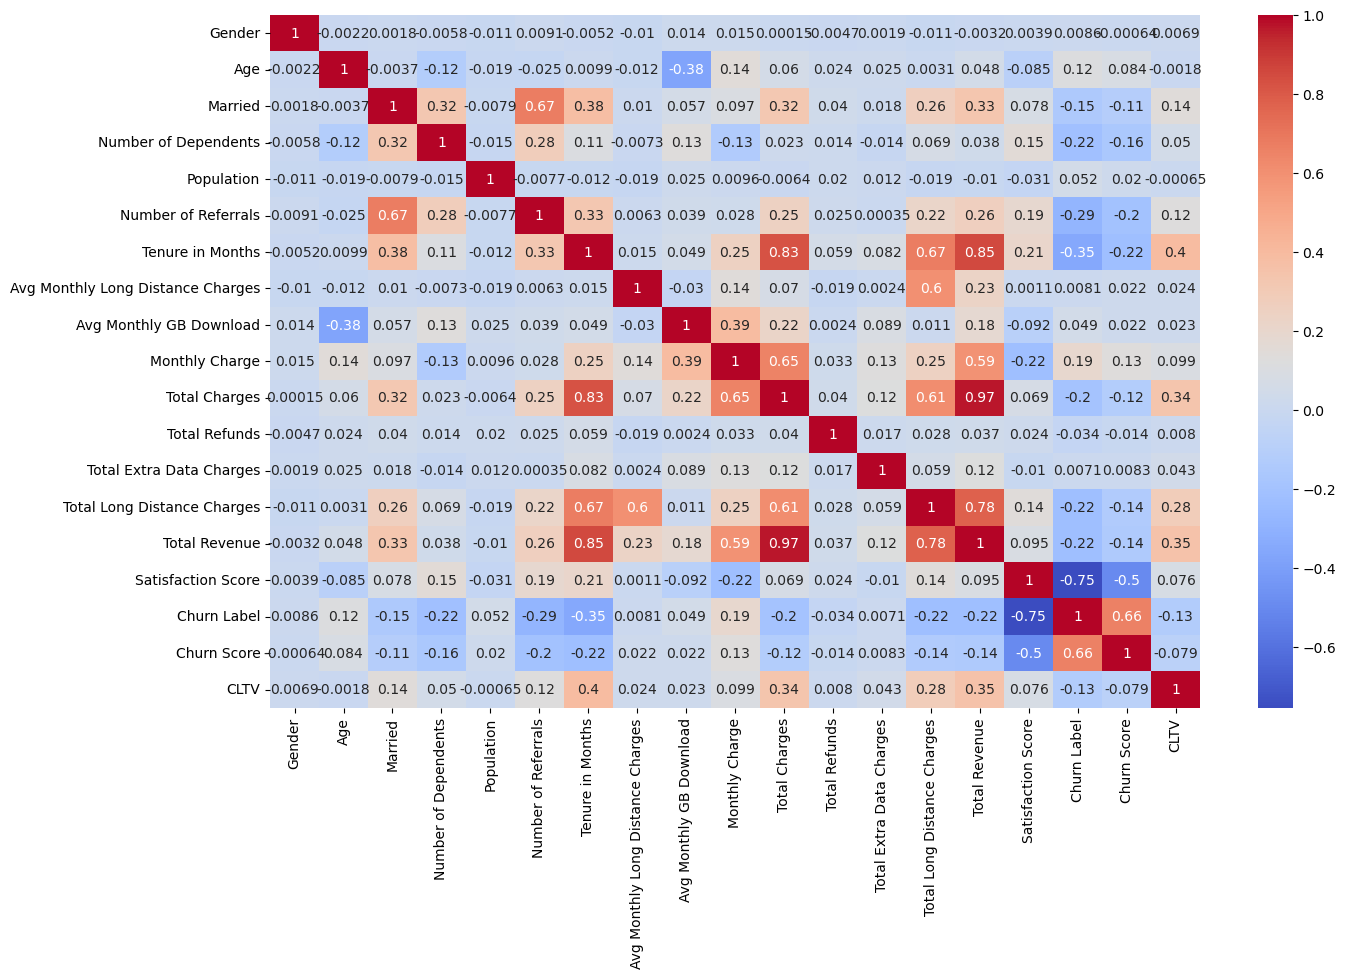

In [43]:
# Correlation Heatmap
df1 = df.select_dtypes(include=['number'])
plt.figure(figsize=(15,9))
sns.heatmap(df1.corr(), cmap='coolwarm', annot=True)
plt.show()

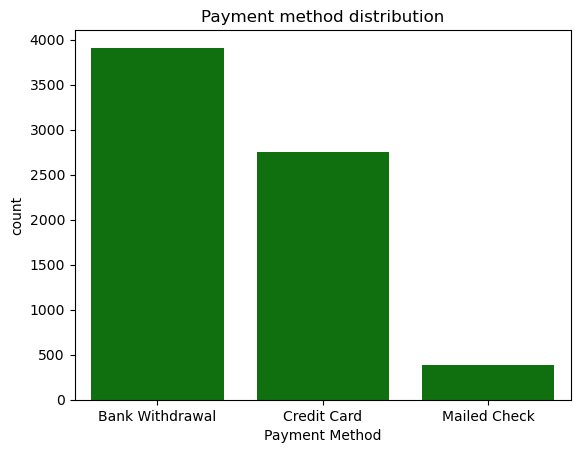

In [45]:
#payment method distribution
plt.title('Payment method distribution')
sns.countplot(data=df,x='Payment Method',color='green')
plt.show()

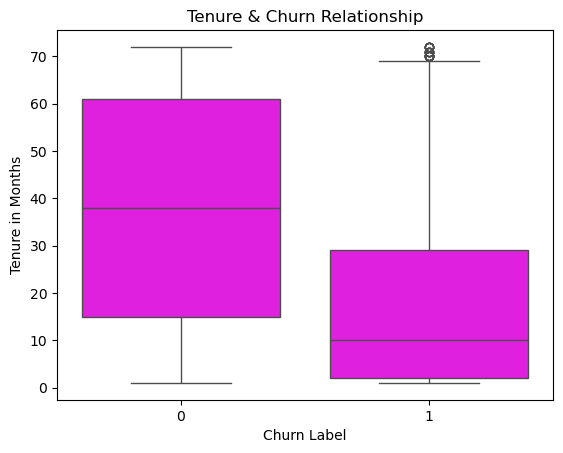

In [41]:
#Tenure & Churn Relationship
plt.title('Tenure & Churn Relationship')
sns.boxplot(data=df,x='Churn Label',y='Tenure in Months',color='magenta')
plt.show()

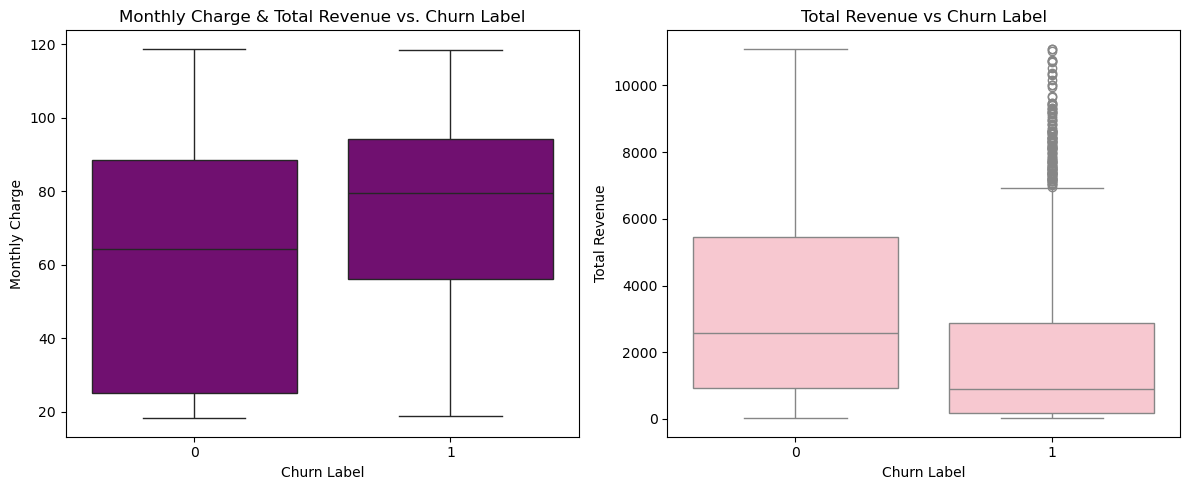

In [43]:
#Revenue & Monthly Charges Analysis
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Monthly Charge & Total Revenue vs. Churn Label')
sns.boxplot(data=df,x='Churn Label',y='Monthly Charge',color='purple')
plt.subplot(1,2,2)
sns.boxplot(data=df, x='Churn Label', y='Total Revenue',color='pink')
plt.title('Total Revenue vs Churn Label')
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3216\942782454.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn Label', y='Age', palette='hot')
C:\Users\Admin\AppData\Local\Temp\ipykernel_3216\942782454.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Senior Citizen', bbox_to_anchor=(1,1))


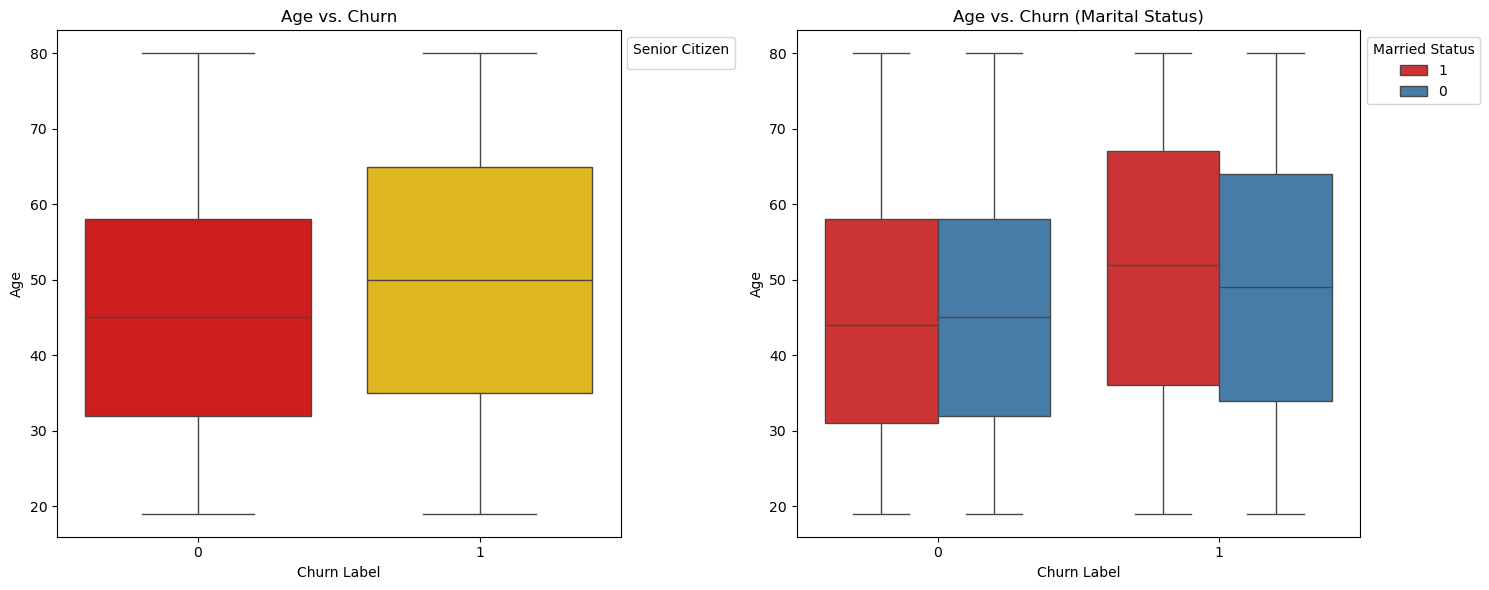

In [49]:
plt.figure(figsize=(15,6))

# Age vs. Churn with Senior Citizen
plt.subplot(1,2,1)
sns.boxplot(data=df, x='Churn Label', y='Age', palette='hot')
plt.title('Age vs. Churn')
plt.legend(title='Senior Citizen', bbox_to_anchor=(1,1))

# Age vs. Churn with Married Status
plt.subplot(1,2,2)
sns.boxplot(data=df, x='Churn Label', y='Age', hue=df['Married'].astype(str), palette='Set1')
plt.title('Age vs. Churn (Marital Status)')
plt.legend(title='Married Status', bbox_to_anchor=(1,1))

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_3216\2303523924.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_val,x='Internet Type',y='Churn Score',palette='viridis')


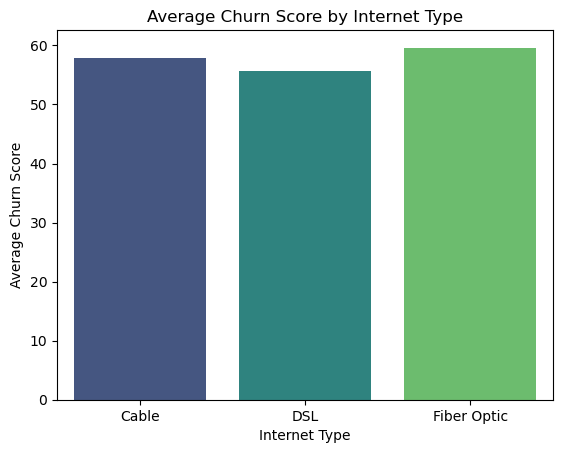

In [51]:
mean_val = df.groupby('Internet Type')['Churn Score'].mean().reset_index()
sns.barplot(data=mean_val,x='Internet Type',y='Churn Score',palette='viridis')
plt.title('Average Churn Score by Internet Type')
plt.xlabel('Internet Type')
plt.ylabel('Average Churn Score')
plt.show()

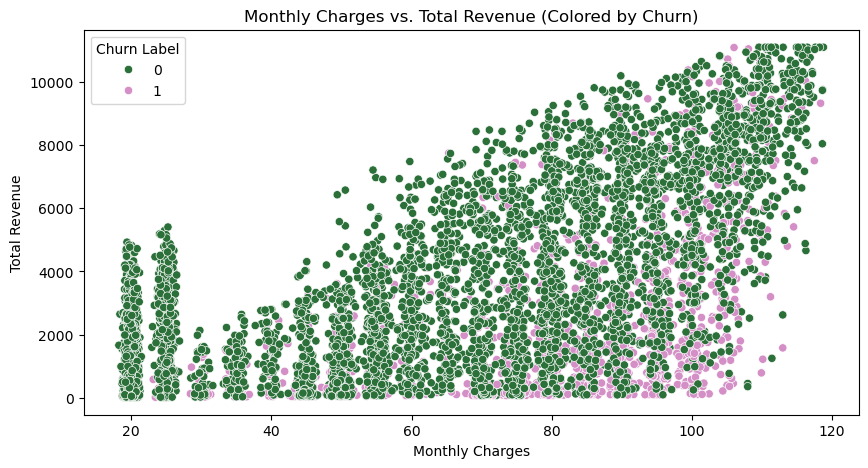

In [53]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Monthly Charge', y='Total Revenue', hue='Churn Label', palette='cubehelix')
plt.title('Monthly Charges vs. Total Revenue (Colored by Churn)')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Revenue')
plt.show()


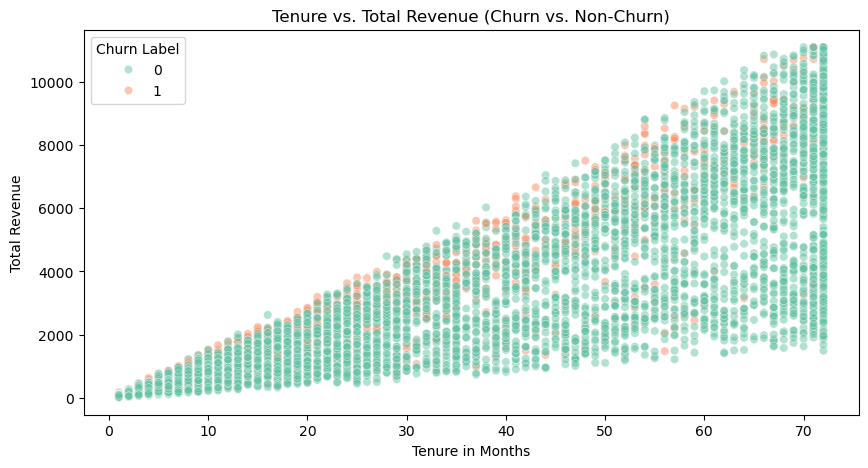

In [55]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Tenure in Months', y='Total Revenue', hue='Churn Label', palette='Set2', alpha=0.5)
plt.title('Tenure vs. Total Revenue (Churn vs. Non-Churn)')
plt.xlabel('Tenure in Months')
plt.ylabel('Total Revenue')
plt.legend(title='Churn Label')
plt.show()

In [57]:
df.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'Country', 'State',
       'City', 'Population', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [59]:
df.drop(columns=['Quarter','City','State','Country','Population','Customer Status','Churn Reason','Churn Category'],axis=1,inplace=True)

## Encode Categorical Features

In [69]:
binary_cols = ['Referred a Friend', 'Phone Service', 'Multiple Lines', 
               'Online Security', 'Online Backup', 'Device Protection Plan', 
               'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 
               'Streaming Music', 'Unlimited Data', 'Paperless Billing','Internet Service']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [71]:
df = pd.get_dummies(df, columns=['Offer', 'Internet Type', 'Contract', 'Payment Method'], drop_first=True)

## Train-Test Split

In [146]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Churn Label'])
y = df['Churn Label']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=44,stratify=y)

## Feature scaling

In [149]:
from sklearn.preprocessing import MinMaxScaler
num_cols = ['Age', 'Number of Dependents', 'Tenure in Months', 
            'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
            'Monthly Charge', 'Total Charges', 'Total Refunds', 
            'Total Extra Data Charges', 'Total Long Distance Charges', 
            'Total Revenue', 'Satisfaction Score', 'Churn Score', 'CLTV']
scaler = MinMaxScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression(max_iter=5000, random_state=44)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9886444286728177
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1035
           1       0.98      0.97      0.98       374

    accuracy                           0.99      1409
   macro avg       0.99      0.98      0.99      1409
weighted avg       0.99      0.99      0.99      1409



## Feature Importance Analysis

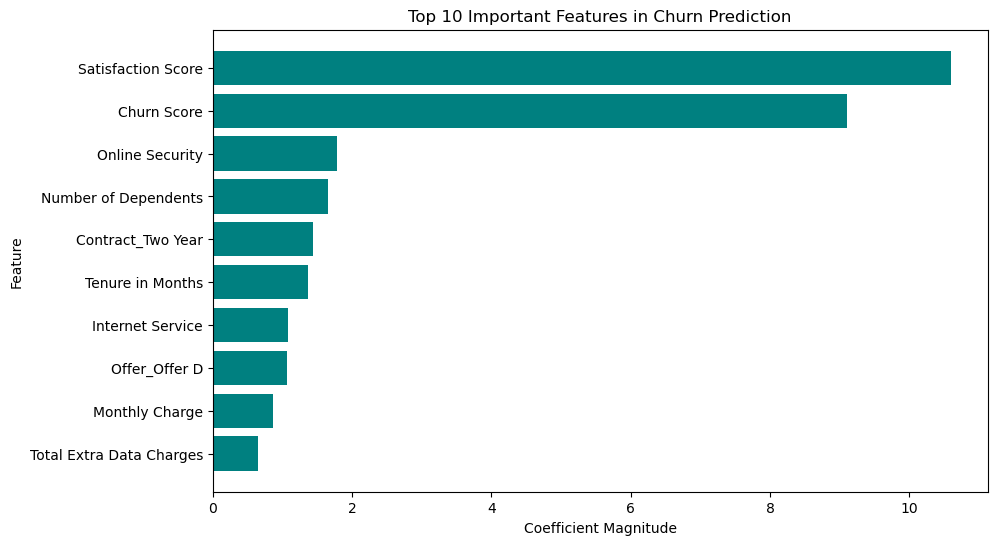

In [153]:
feature_importance=pd.DataFrame({'Feature': x_train.columns, 'Importance': np.abs(model.coef_[0])})
feature_importance=feature_importance.sort_values(by='Importance',ascending=False)
# plotting top 10 features
plt.figure(figsize=(10,6))
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Top 10 Important Features in Churn Prediction')
plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10], color='teal')
plt.gca().invert_yaxis()
plt.show()

## Hyperparameter Tuning for Logistic Regression

In [155]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 10, 'penalty': 'l2'}


In [157]:
# Train the model with best parameters
best_logreg = LogisticRegression(C=10, penalty='l2', solver='liblinear', random_state=44)
best_logreg.fit(x_train, y_train)
y_pred_best = best_logreg.predict(x_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Accuracy: 0.9900638750887154
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1035
           1       0.98      0.98      0.98       374

    accuracy                           0.99      1409
   macro avg       0.99      0.99      0.99      1409
weighted avg       0.99      0.99      0.99      1409



- as we can see above, the model performed better. the accuracy increased from 98.79% to 99.00% after hyperparameter tuning

## Trying a More Powerful Model (Random Forest)

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=44)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print('Random forest accuracy: ',accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random forest accuracy:  0.9886444286728177
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1035
           1       0.98      0.97      0.98       374

    accuracy                           0.99      1409
   macro avg       0.99      0.98      0.99      1409
weighted avg       0.99      0.99      0.99      1409



## Hyperparameter Tuning for Random Forest

In [95]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=44),
                              param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(x_train, y_train)
print("Best Parameters:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


In [96]:
y_pred_best_rf = best_rf.predict(x_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))

Tuned Random Forest Accuracy: 0.9872249822569198
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1035
           1       0.98      0.97      0.98       374

    accuracy                           0.99      1409
   macro avg       0.99      0.98      0.98      1409
weighted avg       0.99      0.99      0.99      1409



## finalizing and saving model

- I finalized the fine tuned logistic regression model as it's accuracy is higher

In [97]:
import joblib
joblib.dump(best_logreg,'logistic_regression_model.pkl')
joblib.dump(scaler,'scaler.pkl')
print("Model and scaler saved successfully!")

Model and scaler saved successfully!


# Testing the model on synthetic data 

In [159]:
loaded_model = joblib.load('logistic_regression_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')
print('model and scaler loaded succesfully!!')

model and scaler loaded succesfully!!


In [161]:
new_test_data = pd.DataFrame([
    [0, 45, 1, 2, 0, 1, 24, 1, 10.5, 0, 1, 30, 1, 0, 1, 0, 1, 1, 0, 1, 0, 75.5, 1800, 0, 5, 200, 2000, 4, 80, 2000, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0] 
], columns=x_train.columns)
new_test_data[num_cols] = scaler.transform(new_test_data[num_cols])

In [163]:
y_new_pred = loaded_model.predict(new_test_data)
print("Predicted value:", y_new_pred)

Predicted value: [1]


In [169]:
# probability count 
print(loaded_model.predict_proba(new_test_data))

[[0. 1.]]


# Conclusion

-  Based on the given customer data, our churn prediction model has predicted that this customer is likely to churn (leave the service). This indicates a high risk of churn, suggesting the need for proactive retention strategies such as personalized offers, better customer support, or loyalty programs to prevent customer loss.

# Additional - cleaning data for exporting in Power BI to create a dashboard

In [174]:
data = pd.read_csv('telco.csv')
data.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [176]:
data.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [180]:
cols=['Customer ID','Churn Label','Contract','Monthly Charge','Tenure in Months','Payment Method','Total Revenue','Internet Service']
data_main = data[cols]
data_main.to_csv('telco_churn_data.csv',index=False)

- In the above code, I loaded the relevant attributes in a different dataset for creating dashboards.